r^2 on train data is 0.0
r^2 on test data is 0.0
MSE on test data is 0.07111111111111061
[
  {
    "id": 4,
    "predictedAirHumidity": 37.266666666666666,
    "timestamp": "2025-05-07T08:53:49"
  },
  {
    "id": 17,
    "predictedAirHumidity": 37.266666666666666,
    "timestamp": "2025-05-07T08:54:38"
  },
  {
    "id": 7,
    "predictedAirHumidity": 37.266666666666666,
    "timestamp": "2025-05-07T08:53:58"
  },
  {
    "id": 11,
    "predictedAirHumidity": 37.266666666666666,
    "timestamp": "2025-05-07T08:54:20"
  },
  {
    "id": 3,
    "predictedAirHumidity": 37.266666666666666,
    "timestamp": "2025-05-07T08:53:46"
  }
]


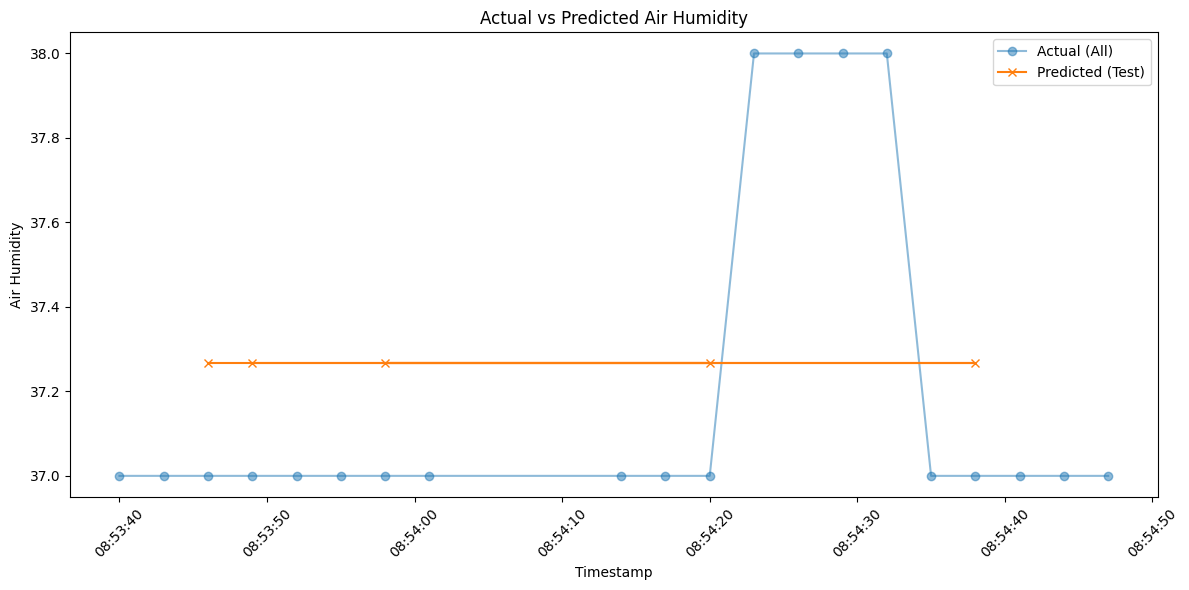

In [ ]:
import sys
import os

ml_service_root = os.path.abspath(os.path.join(os.getcwd(), "../../"))
sys.path.append(ml_service_root)

import matplotlib.pyplot as plt
from ML.models.AirHumidity_models.airHumidity_linearRegresion import run_air_humidity_regression
from ML.utills.jsonify import jsonify_predictions

model, X_test, y_test, y_pred, df = run_air_humidity_regression()

json_output = jsonify_predictions(
    df,
    X_test.index,
    y_pred,
    id_col="Id",
    value_col="predictedAirHumidity",
    timestamp_col="Timestamp",
    output_value_name="predictedAirHumidity",
)
print(json_output)

plt.figure(figsize=(12, 6))

plt.plot(df["Timestamp"], df["AirHumidity"], label="Actual (All)", marker='o', alpha=0.5)
plt.plot(df.loc[X_test.index, "Timestamp"], y_pred, label="Predicted (Test)", marker='x')

plt.xlabel("Timestamp")
plt.ylabel("Air Humidity")
plt.title("Actual vs Predicted Air Humidity")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



r^2 on train data is -0.0014204545454532536
r^2 on test data is 0.0
MSE on test data is 0.06250000000000355
[
  {
    "id": 4,
    "predictedAirHumidity": 37.25000000000001,
    "timestamp": "2025-05-07T08:53:49"
  },
  {
    "id": 17,
    "predictedAirHumidity": 37.25000000000001,
    "timestamp": "2025-05-07T08:54:38"
  },
  {
    "id": 7,
    "predictedAirHumidity": 37.25000000000001,
    "timestamp": "2025-05-07T08:53:58"
  },
  {
    "id": 11,
    "predictedAirHumidity": 37.25000000000001,
    "timestamp": "2025-05-07T08:54:20"
  },
  {
    "id": 3,
    "predictedAirHumidity": 37.25000000000001,
    "timestamp": "2025-05-07T08:53:46"
  }
]


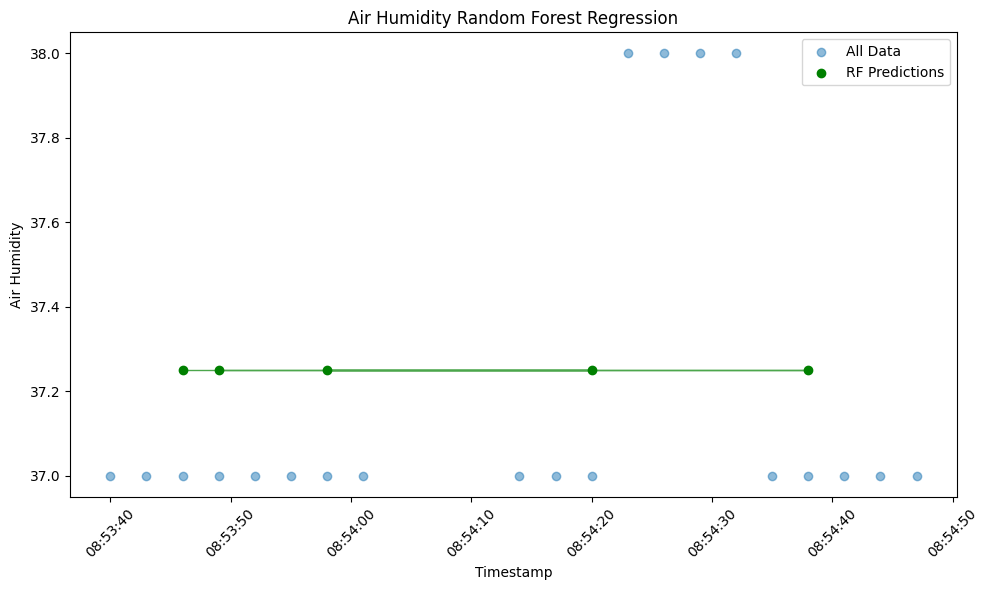

In [ ]:
import sys
import os
import matplotlib.pyplot as plt

ml_service_root = os.path.abspath(os.path.join(os.getcwd(), "../../"))
if ml_service_root not in sys.path:
    sys.path.append(ml_service_root)

from ML.models.AirHumidity_models.airHumidity_randomForests import run_air_humidity_random_forest
from ML.utills.jsonify import jsonify_predictions

model, X_test, y_test, y_pred, df = run_air_humidity_random_forest()

json_output = jsonify_predictions(
    df,
    X_test.index,
    y_pred,
    id_col="Id",  
    value_col="predictedAirHumidity",  
    timestamp_col="Timestamp",
    output_value_name="predictedAirHumidity"
)
print(json_output)

plt.figure(figsize=(10, 6))
plt.scatter(df["Timestamp"], df["AirHumidity"], label="All Data", alpha=0.5)
plt.scatter(df.loc[X_test.index, "Timestamp"], y_pred, color="green", label="RF Predictions")
plt.plot(df.loc[X_test.index, "Timestamp"], y_pred, color="green", linewidth=1, alpha=0.7)
plt.xlabel("Timestamp")
plt.ylabel("Air Humidity")
plt.title("Air Humidity Random Forest Regression")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()